<a href="https://colab.research.google.com/github/SUNNYTHAKURCODE/MACHINELEARNING/blob/master/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIM: TO IMPLEMENT LINEAR DISCRIMINANT ANALYSIS (LDA)

DATASET: Wine.csv

Platform Used: Google colab

Theory :

Linear Discriminant Analysis (LDA) method used to find a linear combination of features that characterizes or separates classes. The resulting combination is used for dimensionality reduction before classification.

Though PCA (unsupervised) attempts to find the orthogonal component axes of maximum variance in a dataset, however, the goal of LDA (supervised) is to find the feature subspace that optimizes class separability.

Listed below are the 5 general steps for performing a linear discriminant analysis;

1. Compute the d-dimensional mean vectors for the different classes from the dataset.


2. Compute the scatter matrices (in-between-class and within-class scatter matrix).


3. Compute the eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd) for the scatter matrices.


4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W (where every column represents an eigenvector).


5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: Y=[X] **x**[W],(where X is a n×d-dimensional matrix representing the n samples, and y are the transformed n×k-dimensional samples in the new subspace).


In [96]:
# link google drive to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# change the working directory of your code on google drive
%cd/content/drive/My Drive/Colab Notebooks/Python Practice

/content/drive/My Drive/Colab Notebooks/Python Practice


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
%matplotlib inline

In [99]:
# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv('wine.csv')

X=df.iloc[:,1:].copy()
target=df.iloc[:,0].copy()
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [100]:
df.shape

(178, 14)

In [101]:
print(X.head())
print(target.head())

   Alcohol  Malic.acid   Ash   Acl  ...  Color.int   Hue    OD  Proline
0    14.23        1.71  2.43  15.6  ...       5.64  1.04  3.92     1065
1    13.20        1.78  2.14  11.2  ...       4.38  1.05  3.40     1050
2    13.16        2.36  2.67  18.6  ...       5.68  1.03  3.17     1185
3    14.37        1.95  2.50  16.8  ...       7.80  0.86  3.45     1480
4    13.24        2.59  2.87  21.0  ...       4.32  1.04  2.93      735

[5 rows x 13 columns]
0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

In [103]:
np.unique(df['Wine'])

array([1, 2, 3])

In [104]:
[s,f]=X.shape
print('no. of feautres f:',f)
print('no. of samples s :',s)

no. of feautres f: 13
no. of samples s : 178


In [0]:
# perform feautre Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
#1. computing d dimensional mean vector for each class 
np.set_printoptions(precision=4)
mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[target==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 0.9192 -0.2923  0.3256 -0.738   0.4632  0.8734  0.9569 -0.579   0.5404
  0.2034  0.4588  0.7714  1.1745]

Mean Vector class 2: [-0.8917 -0.3624 -0.445   0.2231 -0.3646 -0.0581  0.0518  0.0146  0.069
 -0.8528  0.4336  0.2453 -0.7241]

Mean Vector class 3: [ 0.1892  0.8953  0.2579  0.5771 -0.0301 -0.9876 -1.2528  0.6901 -0.7663
  1.0114 -1.2054 -1.3109 -0.3726]



In [117]:
# 3. Compute the Scatter within class  matrices
S_W = np.zeros((13,13))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((f,f))      # scatter matrix for every class
    for row in X[target == cl]:
        row, mv = row.reshape(f,1), mv.reshape(f,1) # make column vectors
        class_sc_mat =class_sc_mat+ (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                 # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 69.9756   1.586  -10.5167  -6.3107   0.2722   9.3862   4.9117  -1.6993
    6.3521  23.0461   0.7418  -1.5222   8.424 ]
 [  1.586  125.1573  12.2831  19.5649  -9.8093  -3.646   -1.484   12.8798
    4.7349 -17.5794 -29.0382  10.324  -16.5377]
 [-10.5167  12.2831 154.4941  93.0013  30.9692  16.5741  19.2481  36.1874
    3.0045   2.7101   6.5174   9.8587  -1.0205]
 [ -6.3107  19.5649  93.0013 126.347   11.9466   9.1457  13.0007  19.8655
    8.5374  -2.314   -2.2665  16.7472  -5.4944]
 [  0.2722  -9.8093  30.9692  11.9466 155.8597  11.3629   8.2262 -28.4214
   27.9955   9.4206   6.801   -4.8791  18.6351]
 [  9.3862  -3.646   16.5741   9.1457  11.3629  85.9391  45.4112 -17.4787
   45.1227  24.1358  -1.8026  23.7094   7.4967]
 [  4.9117  -1.484   19.2481  13.0007   8.2262  45.4112  48.456  -21.6138
   39.3387  21.7876  -3.2424  16.8405   1.9167]
 [ -1.6993  12.8798  36.1874  19.8655 -28.4214 -17.4787 -21.6138 135.346
  -21.3484  -0.9215   8.4051 -20.0601  -2.2

In [108]:
# compute between class scatter matrix
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((13,13))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[target==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(13,1) # make column vector
    overall_mean = overall_mean.reshape(13,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 1.0802e+02  1.5217e+01  4.8172e+01 -4.8911e+01  4.7930e+01  4.2074e+01
   3.7241e+01 -2.6056e+01  1.7980e+01  7.4207e+01 -1.3513e+01  1.4399e+01
   1.0616e+02]
 [ 1.5217e+01  5.2843e+01  1.6917e+01  3.1788e+01  9.4933e-02 -5.6014e+01
  -7.1675e+01  3.9270e+01 -4.4028e+01  6.1899e+01 -7.0872e+01 -7.5954e+01
  -1.7640e+01]
 [ 4.8172e+01  1.6917e+01  2.3506e+01 -1.4082e+01  2.0043e+01  6.3843e+00
   1.2357e+00 -3.0383e+00 -1.2864e+00  4.3372e+01 -1.9808e+01 -9.1625e+00
   4.0826e+01]
 [-4.8911e+01  3.1788e+01 -1.4082e+01  5.1653e+01 -2.6780e+01 -6.6304e+01
  -7.5544e+01  4.4557e+01 -4.3662e+01  5.6482e+00 -4.6497e+01 -6.6012e+01
  -7.2932e+01]
 [ 4.7930e+01  9.4933e-02  2.0043e+01 -2.6780e+01  2.2140e+01  2.6800e+01
   2.6623e+01 -1.7199e+01  1.4091e+01  2.6171e+01  3.0598e+00  1.6628e+01
   5.1381e+01]
 [ 4.2074e+01 -5.6014e+01  6.3843e+00 -6.6304e+01  2.6800e+01  9.2061e+01
   1.0848e+02 -6.2610e+01  6.3887e+01 -3.3950e+01  7.8998e+01  1.0088e+02
   8.1

In [0]:
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [0]:
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(f,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

In [0]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(f,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [112]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

9.081739435042465
4.128469045639482
1.7763568394002505e-15
1.5050671905118673e-15
1.050998983578873e-15
1.050998983578873e-15
4.871296557640929e-16
4.871296557640929e-16
3.660117614131498e-16
3.105318105859483e-16
3.105318105859483e-16
6.043622178796811e-17
6.043622178796811e-17


In [113]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 68.75%
eigenvalue 2: 31.25%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%


In [114]:
#k x d dimensional eigen vectormatrix W here 13 x 2 based on the 2 most informative eigenpairs
W = np.hstack((eig_pairs[0][1].reshape(f,1), eig_pairs[1][1].reshape(f,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.14   -0.4187]
 [ 0.0789 -0.2018]
 [-0.0433 -0.3807]
 [ 0.221   0.2892]
 [-0.0132  0.0039]
 [ 0.1654  0.0119]
 [-0.7095  0.2907]
 [-0.0796  0.1201]
 [ 0.0328  0.104 ]
 [ 0.352  -0.3473]
 [-0.08    0.2049]
 [-0.3514 -0.0215]
 [-0.3624 -0.5315]]


In [0]:
X_lda = X.dot(W)
assert X_lda.shape == (s,2) 

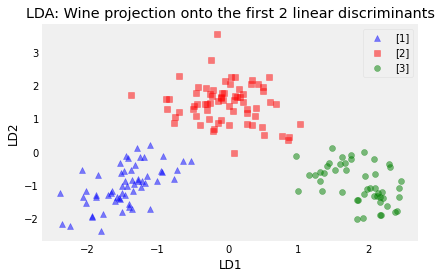

In [116]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)


  
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[target == label],
                y=X_lda[:,1].real[target == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Wine projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()